In [1]:
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file

# For visvalization
import matplotlib.pyplot as plt

from pandas import DataFrame

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.ar_model import AR

from matplotlib.font_manager import FontProperties

%matplotlib inline

# 1. Analyze the Overall Condition of Health Life Expectancy

In [2]:
df_h_health = pd.read_csv('../dataset/correlation_clustered_data/H Vs GDP.csv')
df_h_health = df_h_health.iloc[2:]
df_h_health

,Healthy life expectancy at birth,Log GDP per capita,Selected,Country name,Cluster,Silhouette
2,0.449872883,0.20074713,No,Afghanistan,C1,0.6774429347566892
3,0.79836594,0.554429518,No,Albania,C4,0.6011381089031288
4,0.740803489,0.534348,No,Algeria,C4,0.6717666720856856
5,0.805491728,0.672625459,No,Argentina,C2,0.6493071013639691
6,0.760043412,0.541871079,No,Armenia,C4,0.6607755661438757
...,...,...,...,...,...,...
138,0.757681197,0.545028258,No,Venezuela,C4,0.6604369773876213
139,0.785000164,0.429177269,No,Vietnam,C4,0.6480377687227262
140,0.522028788,0.256787046,No,Yemen,C1,0.5630794213673398
141,0.479310662,0.290144544,No,Zambia,C1,0.6053555826835465


In [3]:
c3_health_countries = df_h_health[df_h_health['Cluster'] == 'C3']['Country name']
c1_health_countries = df_h_health[df_h_health['Cluster'] == 'C1']['Country name']

In [4]:
c3_list = c3_health_countries.values.tolist()
c1_list = c1_health_countries.values.tolist()
print(c3_list)

['Australia', 'Austria', 'Belgium', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong S.A.R. of China', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'North Cyprus', 'Norway', 'Portugal', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'United Kingdom', 'United States']


In [5]:
df_ts = pd.read_csv('../dataset/normalized_filled_clean_data/normalized-filled-clean-world-happiness-report.csv')

In [6]:
df_c3 = df_ts[df_ts['Country name'].isin(c3_list)]
df_c1 = df_ts[df_ts['Country name'].isin(c1_list)]

In [7]:
def get_yrly_avg_dict(df, years, col_item):
    avg_trend = {}
    for year in years:
        mean = df[df['year'] == year][col_item].mean()
        avg_trend[year] = mean
#     print(avg_trend)
    return avg_trend

In [8]:
#2006 - 2021
init = 2006
years = []
for i in range(16):
    years.append(init)
    init += 1

def plot_by_dict(dis_dict, title, xlabel, ylabel):
    fig = plt.figure()
    fig.suptitle(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=16)
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))
    plt.show()

def plot_acf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_acf(avg, lags=lags)
    
def plot_pacf_by_dict(dis_dict, lags):
    avg = []
    for a in dis_dict.values():
        avg.append(a)
    avg = pd.Series(avg)
    plot_pacf(avg, lags=lags)
    

# Basic Plotting

{2006: 0.8683300781250002, 2007: 0.8707645089285715, 2008: 0.874747488839286, 2009: 0.878842075892857, 2010: 0.8832249813988098, 2011: 0.885996558779762, 2012: 0.8887681361607144, 2013: 0.891530412946429, 2014: 0.8942926897321432, 2015: 0.8970549665178572, 2016: 0.9006821986607145, 2017: 0.9043094308035715, 2018: 0.9079366629464285, 2019: 0.9115638950892858, 2020: 0.9149305943080358, 2021: 0.9114613560267858}


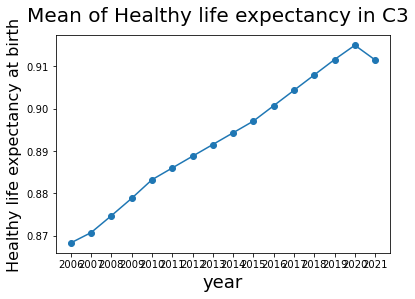

In [9]:
c3_health_avg_trend = get_yrly_avg_dict(df_c3, years, col_item = 'Healthy life expectancy at birth')
print(c3_health_avg_trend)
plot_by_dict(c3_health_avg_trend, "Mean of Healthy life expectancy in C3", "year", "Healthy life expectancy at birth")

# Differencing Plot

array([<AxesSubplot:>], dtype=object)

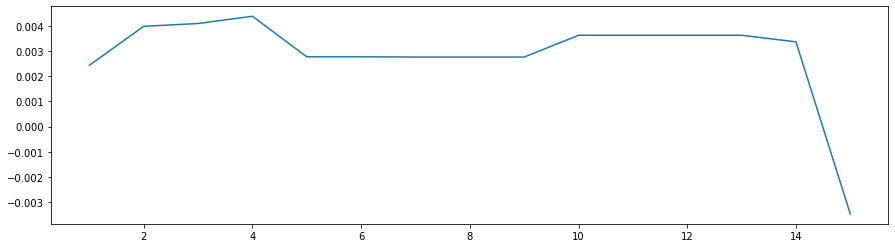

In [10]:
ser = pd.Series(c3_health_avg_trend.values())
ser.diff().plot(subplots=True, figsize=(15,4))

# ACF, PACF Analysis

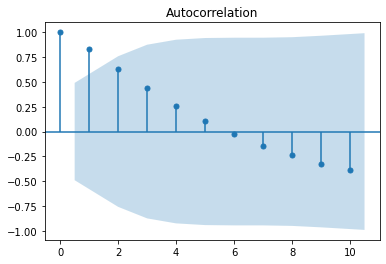

In [11]:
plot_acf_by_dict(c3_health_avg_trend, lags=10)

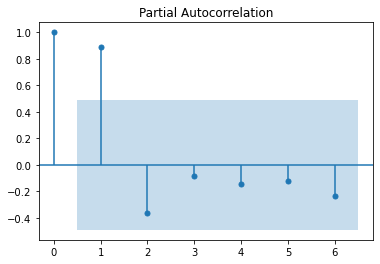

In [12]:
plot_pacf_by_dict(c3_health_avg_trend, lags=6)

# ARIMA Model Analysis

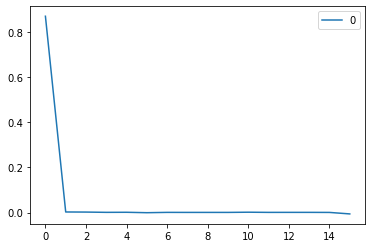

In [13]:
c3_avg = []
for a in c3_health_avg_trend.values():
    c3_avg.append(a)
    
c3_model = ARIMA(c3_avg, order=(1,1,1))
c3_model_fit = c3_model.fit()

residuals = DataFrame(c3_model_fit.resid)
residuals.plot()
plt.show()

# ARIMA Model Prediction

In [14]:
X = np.asarray(c3_avg)
X

array([0.86833008, 0.87076451, 0.87474749, 0.87884208, 0.88322498,
       0.88599656, 0.88876814, 0.89153041, 0.89429269, 0.89705497,
       0.9006822 , 0.90430943, 0.90793666, 0.9115639 , 0.91493059,
       0.91146136])

C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\wing9\anaconda3\envs\py37\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

predicted=0.899817, expected=0.900682
predicted=0.904309, expected=0.904309
predicted=0.907937, expected=0.907937
predicted=0.911564, expected=0.911564
predicted=0.915191, expected=0.914931
predicted=0.918297, expected=0.911461
Test RMSE: 0.003


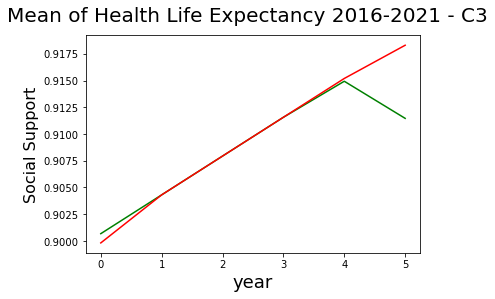

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(1,2,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
fig = plt.figure()
fig.suptitle('Mean of Health Life Expectancy 2016-2021 - C3', fontsize=20)
plt.xlabel('year', fontsize=18)
plt.ylabel('Health Life Expectancy', fontsize=16)
plt.plot(test, color='green')
plt.plot(predictions, color='red')
plt.show()

# Seasonal Analysis

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = pd.Series(c3_health_avg_trend)
# result = seasonal_decompose(series, model='additive', period=1)
# result.plot()

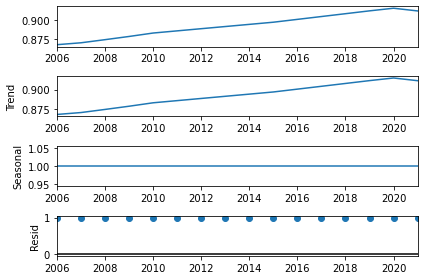

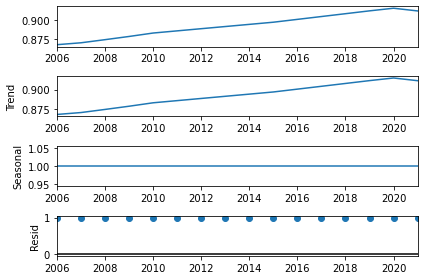

In [17]:
result = seasonal_decompose(series, model='multiplicative',period=1)
result.plot()

In [18]:
# c1_health_avg_trend = get_yrly_avg_dict(df_c1, years, col_item = 'Healthy life expectancy at birth')
# print(c1_health_avg_trend)
# plot_by_dict(c1_health_avg_trend, "Mean of Healthy life expectancy in C1", "year", "Healthy life expectancy at birth")

# 2. Condition of Health by Countries

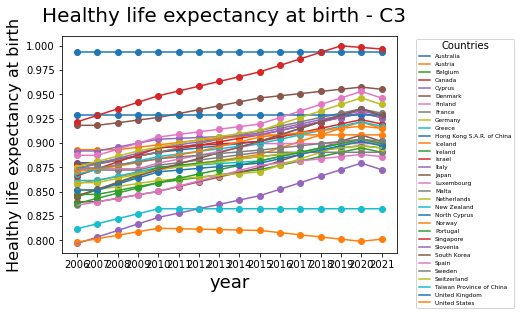

In [19]:
fig = plt.figure()
fig.suptitle("Healthy life expectancy at birth - C3", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Healthy life expectancy at birth", fontsize=16)

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

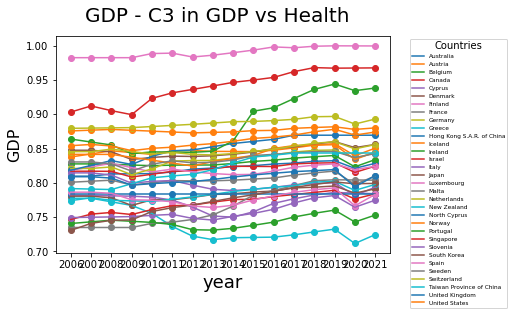

In [20]:
fig = plt.figure()
fig.suptitle("GDP - C3 in GDP vs Health", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("GDP", fontsize=16)

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(c3_list, title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

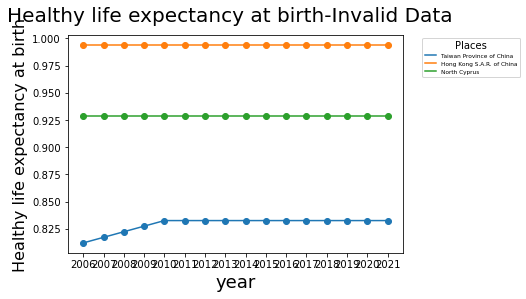

In [35]:
fig = plt.figure()
fig.suptitle("Healthy life expectancy at birth-Invalid Data", fontsize=20)
plt.xlabel("year", fontsize=18)
plt.ylabel("Healthy life expectancy at birth", fontsize=16)


invalid = ['Somalia', 'Maldives', 'Central African Republic', 'Gambia', 
                     'Lesotho', 'North Cyprus', 'Syria', 'Comoros', 'Belize'
                     , 'Cuba', 'Oman', 'Suriname', 'Djibouti', 
                     'Somaliland region', 'Kosovo', 'Palestinian Territories',
                     'Burundi', 'Qatar', 'South Sudan', 'Swaziland', 'Bhutan',
                     'Taiwan Province of China', 'Hong Kong S.A.R. of China',
                     'Angola', 'Namibia', 'Libya', 'Trinidad and Tobago', 
                     'Sudan', 'Jamaica', 'Guyana']

invalid_countries = list(set(invalid) & set(c3_list))

for country in invalid_countries:
#     data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    data.index = np.arange(2006, 2021+1)
    dis_dict = data.to_dict()
    
    plt.scatter(range(len(dis_dict)), list(dis_dict.values()))
    plt.plot(range(len(dis_dict)), list(dis_dict.values()))
    plt.xticks(range(len(dis_dict)), list(dis_dict.keys()))

fontP = FontProperties()
fontP.set_size('xx-small')
plt.legend(invalid_countries, title='Places', bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)
plt.show()

# 3. Forecastability of a SocialSupport for C3 Countries

In [22]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
#         print(N, " ", m)
        if (N - m + 1) == 0:
             return np.nan
        return (N - m + 1)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

def sort_dict(dis_dict):
    return {k: v for k, v in sorted(dis_dict.items(), key=lambda item: item[1])}

<BarContainer object of 32 artists>

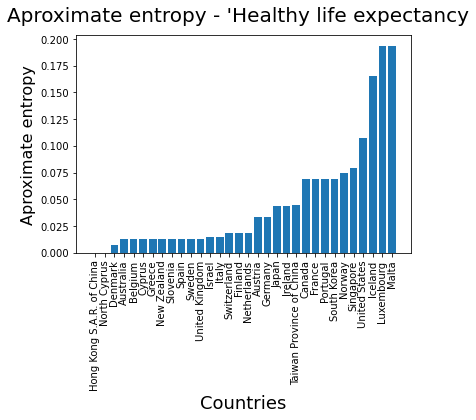

In [23]:
AE_dict = {}

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    data.index = np.arange(0, 16)
    AE = ApEn(data, m=2, r=0.2*np.std(data))
    AE_dict[country] = AE


# The Lower the approximate entropy, 
# the Easier it is to forecast it. 
Sorted_AE_dict = sort_dict(AE_dict)


fig = plt.figure()
fig.suptitle("Aproximate entropy - 'Healthy life expectancy", fontsize=20)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Aproximate entropy", fontsize=16)

AE_keys = Sorted_AE_dict.keys()
AE_values = Sorted_AE_dict.values()
plt.xticks(rotation=90)
plt.bar(AE_keys, AE_values)

<BarContainer object of 32 artists>

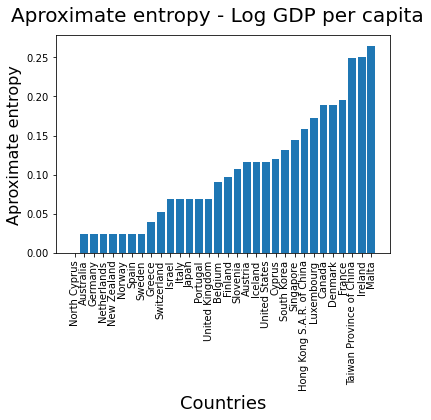

In [24]:
AE_dict = {}

for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    data.index = np.arange(0, 16)
    AE = ApEn(data, m=2, r=0.2*np.std(data))
    AE_dict[country] = AE


# The Lower the approximate entropy, 
# the Easier it is to forecast it. 
Sorted_AE_dict = sort_dict(AE_dict)


fig = plt.figure()
fig.suptitle("Aproximate entropy - Log GDP per capita", fontsize=20)
plt.xlabel("Countries", fontsize=18)
plt.ylabel("Aproximate entropy", fontsize=16)

AE_keys = Sorted_AE_dict.keys()
AE_values = Sorted_AE_dict.values()
plt.xticks(rotation=90)
plt.bar(AE_keys, AE_values)

# 4. Upward Trend - Slope:

In [25]:
def trendline(data, order=1):
    coeffs = np.polyfit(data.index.values, list(data), order)
    slope = coeffs[-2]
    return float(slope)

Text(0.5, 1.0, 'Trend of Healthy life expectancy')

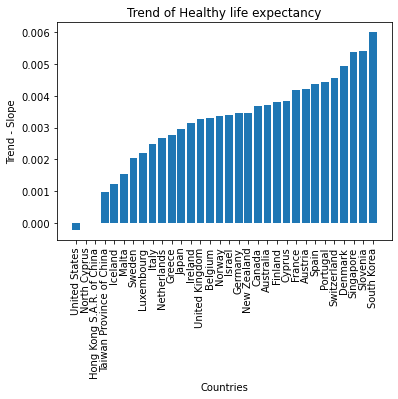

In [26]:
health_support_trend_dict = {}
for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Healthy life expectancy at birth']
    health_support_trend_dict[country] = trendline(data)

health_support_trend_dict = sort_dict(health_support_trend_dict)

health_support_keys = health_support_trend_dict.keys()
health_support_values = health_support_trend_dict.values()
plt.xticks(rotation=90)
plt.bar(health_support_keys, health_support_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of Healthy life expectancy")

Text(0.5, 1.0, 'Trend of GDP')

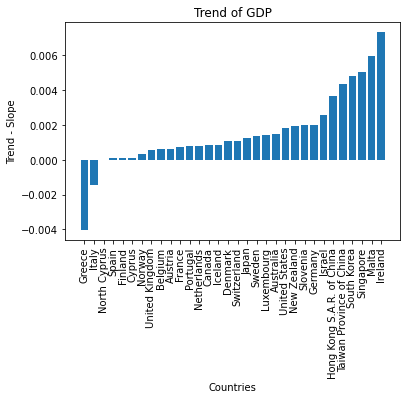

In [27]:
gdp_trend_dict = {}
for country in c3_list:
    data = df_c3[df_c3['Country name'] == country]['Log GDP per capita']
    gdp_trend_dict[country] = trendline(data)

gdp_trend_dict = sort_dict(gdp_trend_dict)

gdp_keys = gdp_trend_dict.keys()
gdp_values = gdp_trend_dict.values()
plt.xticks(rotation=90)
plt.bar(gdp_keys, gdp_values)

plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP")

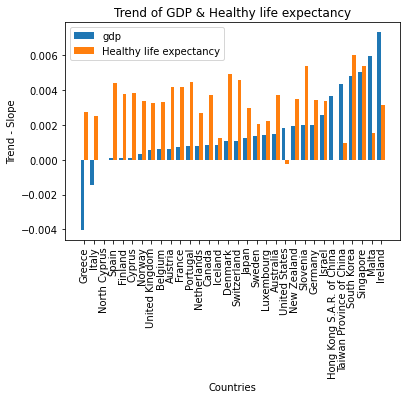

In [28]:
plt.xticks(rotation=90)

hle_values_sorted_by_gdp = []

X = list(gdp_keys)


for country in X:
    hle_values_sorted_by_gdp.append(health_support_trend_dict[country])

X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, gdp_values, 0.4, label = 'gdp')
plt.bar(X_axis + 0.2, hle_values_sorted_by_gdp, 0.4, label = 'Healthy life expectancy')
  
plt.xticks(X_axis, X)
plt.xlabel("Countries")
plt.ylabel("Trend - Slope")
plt.title("Trend of GDP & Healthy life expectancy")
plt.legend()
plt.show() 